<a href="https://colab.research.google.com/github/sivasakthivelg/Prodify-Info-Tech/blob/main/Prodify_Info_Tech.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset loaded successfully!

Preview of data:
   GrLivArea  BedroomAbvGr  FullBath  SalePrice
0       1710             3         2     208500
1       1262             3         2     181500
2       1786             3         2     223500
3       1717             3         1     140000
4       2198             4         2     250000

Model Evaluation:
✅ Mean Squared Error (MSE): 2806426667.25
✅ R² Score: 0.6341

Model Coefficients:
GrLivArea: 104.03
BedroomAbvGr: -26655.17
FullBath: 30014.32
Intercept: 52261.75


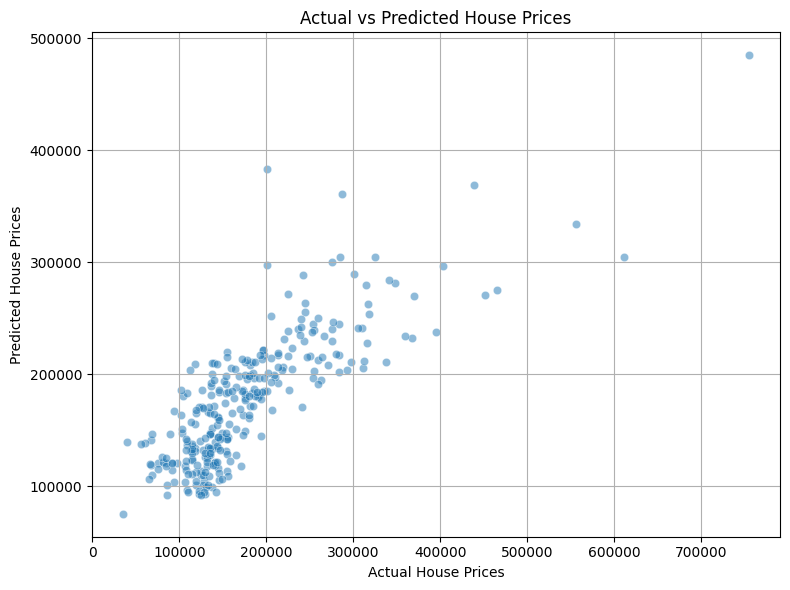

In [ ]:
# house_price_prediction.py

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# Make sure 'train.csv' is in the same directory as this Python file
try:
    data = pd.read_csv("train.csv")
    print("Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ 'train.csv' not found. Please download it from Kaggle and place it in the project folder.")
    exit()

# Display the first few rows
print("\nPreview of data:")
print(data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']].head())

# Select the features and target variable
features = ['GrLivArea', 'BedroomAbvGr', 'FullBath']
target = 'SalePrice'

# Drop rows with missing values
df = data[features + [target]].dropna()

X = df[features]
y = df[target]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ R² Score: {r2:.4f}")

# Display coefficients
print("\nModel Coefficients:")
for feature, coef in zip(features, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {model.intercept_:.2f}")

# Visualization: Actual vs Predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()


# New Section